## Figure 2: evolution of the first three moments for different values of coalescence efficiency
https://www.essoar.org/doi/abs/10.1002/essoar.10510248.1

In [1]:
%load_ext autoreload
%autoreload

In [2]:
from matplotlib import pyplot

In [3]:
from PySDM_examples.Bieli_et_al_2022.settings import Settings
from PySDM_examples.Bieli_et_al_2022.simulation import make_core
from PySDM.physics import si
from atmos_cloud_sim_uj_utils import show_plot

0
[9.9998e+08]
1
gamma [1. 1. 1. 1. 1. 1. 1. 1.]
multiplicity [62498750 62498750 62498750 62498750 62498750 62498750 62498750 62498750
 62498750 62498750 62498750 62498750 62498750 62498750 62498750 62498750]
Ec [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
[4.9999e+08]
2
gamma [1. 1. 1. 1. 1. 1. 1. 1.]
multiplicity [31249375 31249375 31249375 31249375 31249375 31249375 31249375 31249375
 31249375 31249375 31249375 31249375 31249375 31249375 31249375 31249375]
Ec [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
[2.81244375e+08]


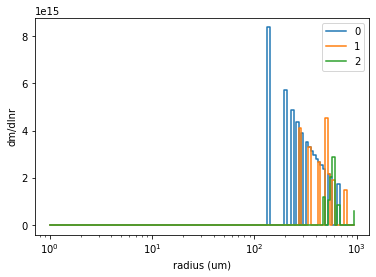

HTML(value="<a href='./fig2.pdf' target='_blank'>./fig2.pdf</a><br>")

In [5]:
settings = Settings()
for i in range(1):
    coal_eff = settings.coal_effs[i]
    particulator = make_core(settings, coal_eff)
    for step in settings.output_steps:
        print(step, flush=True)
        particulator.run(step - particulator.n_steps)
        pyplot.step(x=settings.radius_bins_edges[:-1] / si.micrometres, 
                    y=particulator.products['dv/dlnr'].get() * settings.rho,
                    where='post')
        print(particulator.products['M0'].get())
    
pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr")
pyplot.legend(settings.output_steps)
show_plot('fig2.pdf')